<a href="https://colab.research.google.com/github/karthisha-13/GENERATIVE-AI_2025/blob/main/2303A52099_Genrative_AI_Assignment_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to predict the quality of wine using the Keras deep
learning library

Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.6227 - loss: 0.6770 - val_accuracy: 0.5909 - val_loss: 0.6876
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6280 - loss: 0.6721 - val_accuracy: 0.6039 - val_loss: 0.6839
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6425 - loss: 0.6701 - val_accuracy: 0.6039 - val_loss: 0.6806
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6391 - loss: 0.6661 - val_accuracy: 0.6234 - val_loss: 0.6775
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6339 - loss: 0.6697 - val_accuracy: 0.6234 - val_loss: 0.6745
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6310 - loss: 0.6628 - val_accuracy: 0.6299 - val_loss: 0.6717
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6622 - loss: 0.6586 - val_accuracy: 0.6234 - val_loss: 0.6690
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6465 - loss: 0.6623 - val_accuracy: 0.

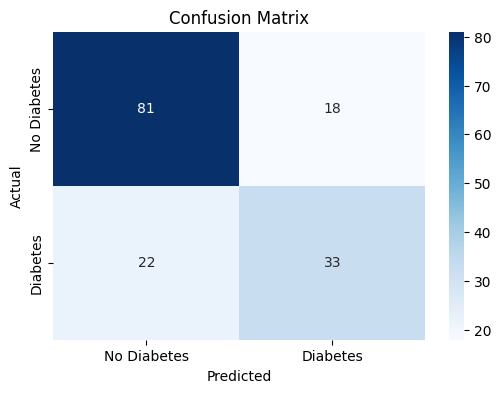

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Prediction for example features: No Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url, header=None)
df.columns = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
              'bmi', 'diabetespedigree', 'age', 'outcome']

X = df.drop(columns=['outcome'])
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(12, activation='swish'),
    Dense(25, activation='swish'),
    Dense(15, activation='swish'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc}, Testing Accuracy: {test_acc}')

model.save('diabetes_model.keras')

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_diabetes(features):
    loaded_model = keras.models.load_model('diabetes_model.keras')
    features = scaler.transform([features])
    return (loaded_model.predict(features)[0][0] > 0.5).astype(int)

example_features = X_test[0]
prediction = predict_diabetes(example_features)
print(f'Prediction for example features: {"Diabetes" if prediction else "No Diabetes"}')